In [2]:
import numpy as np
from glob import glob
import pickle

In [17]:
import matplotlib.pyplot as plt

In [11]:
fs = glob('spect/tmlcc_dataset/mof_cif_train/*.npy')[:59500] + glob('spect/tmlcc_dataset/mof_cif_pretest/*.npy')[:500]


In [22]:
from sklearn.decomposition import PCA

In [14]:
stacked = np.stack([np.load(f) for f in fs])

In [15]:
stacked.shape

(60000, 42, 200)

In [9]:
stacked_train = np.load('stacked_train.npy')

In [8]:
stacked_test = np.load('stacked_test.npy')

In [10]:
stacked_train.shape

(68613, 42, 200)

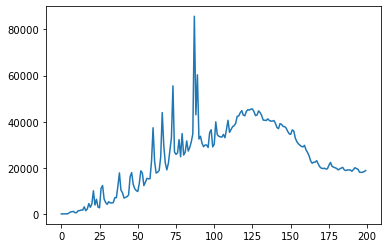

In [21]:
plt.plot(np.max(np.max(np.vstack([stacked_train, stacked_test]), axis=0), axis=0).flatten())

In [11]:
stacked_test.shape

(17000, 42, 200)

In [30]:
pcas = []
for feat in range(42):
    pcas.append(PCA(4))
    pcas[feat].fit(stacked[:, feat, :])
with open('pca_objs.pkl', 'wb') as fp:
    pickle.dump(pcas, fp)

In [25]:
pcas[1].explained_variance_

array([43.91869738, 16.93136197,  5.51204127,  3.23358316])